In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from empiricaldist import Cdf
from empiricaldist import Pmf

## 1. Read, clean, and validate

### Read the codebook
When you work with datasets like the NSFG, it is important to read the documentation carefully. If you interpret a variable incorrectly, you can generate nonsense results and never realize it. So before you start coding, you'll need to get familiar with the NSFG codebook, which describes every variable.

Here is the documentation from the NSFG codebook for "BIRTHWGT_OZ1":

<img src="./data/img.jpg" alt="\n" width="800"  style="display:block"/>
<br> </br>

**How many respondents refused to answer this question?**
 
- [x] 1
- [ ] 35
- [ ] 48-49
- [ ] 2967

### Exploring the NSFG data
- **Calculate the number of rows and columns in the DataFrame `nsfg`.**

In [2]:
nsfg = pd.read_hdf('data/nsfg.hdf5')
nsfg.shape

(9358, 10)

- **Display the names of the columns in `nsfg`.**

In [3]:
nsfg.columns

Index(['caseid', 'outcome', 'birthwgt_lb1', 'birthwgt_oz1', 'prglngth',
       'nbrnaliv', 'agecon', 'agepreg', 'hpagelb', 'wgt2013_2015'],
      dtype='object')

- **Select the column `'birthwgt_oz1'` and assign it to a new variable called `ounces`**

In [4]:
ounces = nsfg['birthwgt_oz1']

- **Display the first 5 elements of `ounces`.**

In [5]:
ounces.head()

0     4.0
1    12.0
2     4.0
3     NaN
4    13.0
Name: birthwgt_oz1, dtype: float64

### Validate a variable
In the `nsfg` dataset, the variable `'outcome'` encodes the outcome of each pregnancy as shown below:

| value	| label |
| ----- | ----- |
| 1 	| Live birth |
| 2 	| Induced abortion |
| 3 | Stillbirth |
| 4	| Miscarriage |
| 5	| Ectopic pregnancy | 
| 6	| Current pregnancy |

**How many pregnancies in this dataset ended with a live birth?**

- [X] 6489
- [ ] 9538
- [ ] 1469
- [ ] 6

In [6]:
nsfg['outcome'].value_counts()

1    6489
4    1469
2     947
6     249
5     118
3      86
Name: outcome, dtype: int64

### Clean a variable

In the `nsfg` dataset, the variable `'nbrnaliv'` records the number of babies born alive at the end of a pregnancy.

If you use `.value_counts()` to view the responses, you'll see that the value `8` appears once, and if you consult the codebook, you'll see that **this value indicates that the respondent refused to answer the question**.

Your job in this exercise is to replace this value with `np.nan`. Recall from the video how Allen replaced the values `98` and `99` in the ounces column using the `.replace()` method:

```py
ounces.replace([98, 99], np.nan, inplace=True)
```
- In the `'nbrnaliv'` column, replace the value `8`, in place, with the special value `NaN`.
- Confirm that the value `8` no longer appears in this column by printing the values and their frequencies.

In [7]:
# Replace the value 8 with NaN
nsfg['nbrnaliv'].replace(8, np.nan, inplace = True)

# Print the values and their frequencies
nsfg['nbrnaliv'].value_counts()

1.0    6379
2.0     100
3.0       5
Name: nbrnaliv, dtype: int64

### Compute a variable
For each pregnancy in the `nsfg` dataset, the variable `'agecon'` encodes the respondent's age at conception, and `'agepreg'` the respondent's age at the end of the pregnancy.

Both variables are recorded as integers with two implicit decimal places, so the value `2575` means that the respondent's age was `25.75`.


- Select `'agecon'` and `'agepreg'`, divide them by `100`, and assign them to the local variables `agecon` and `agepreg`.

In [8]:
# Select the columns and divide by 100
agecon = nsfg['agecon']/100
agepreg = nsfg['agepreg']/100

- Compute the difference, which is an estimate of the duration of the pregnancy. Keep in mind that for each pregnancy, `agepreg` will be larger than `agecon`.

In [9]:
# Compute the difference
preg_length = agepreg  - agecon

- Use `.describe()` to compute the mean duration and other summary statistics.

In [10]:
# Compute summary statistics
preg_length.describe()

count    9109.000000
mean        0.552069
std         0.271479
min         0.000000
25%         0.250000
50%         0.670000
75%         0.750000
max         0.920000
dtype: float64

### Make a histogram
Histograms are one of the most useful tools in exploratory data analysis. They quickly give you an overview of the distribution of a variable, that is, what values the variable can have, and how many times each value appears.

As we saw in a previous exercise, the NSFG dataset includes a variable 'agecon' that records age at conception for each pregnancy. Here, you're going to plot a histogram of this variable. You'll use the bins parameter that you saw in the video, and also a new parameter - histtype - which you can read more about here in the matplotlib documentation. Learning how to read documentation is an essential skill. If you want to learn more about matplotlib, you can check out DataCamp's Introduction to Data Visualization with Matplotlib course.

- Plot a histogram of agecon with 20 bins.

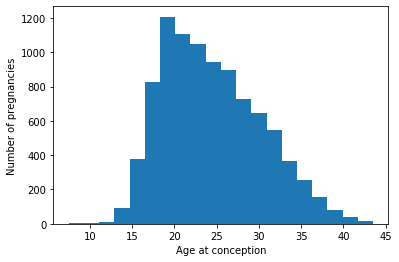

In [11]:
# Plot the histogram
plt.hist(agecon, bins = 20)

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

- Adapt your code to make an unfilled histogram by setting the parameter histtype to be 'step'.

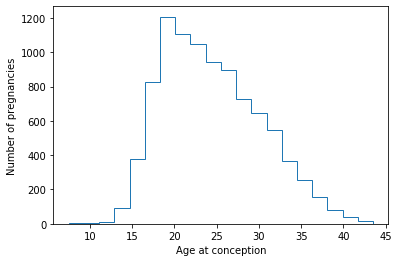

In [12]:
# Plot the histogram
plt.hist(agecon, bins=20, histtype='step')

# Label the axes
plt.xlabel('Age at conception')
plt.ylabel('Number of pregnancies')

# Show the figure
plt.show()

### Compute birth weight
Now let's pull together the steps in this chapter to compute the average birth weight for full-term babies.

I've provided a function, resample_rows_weighted, that takes the NSFG data and resamples it using the sampling weights in wgt2013_2015. The result is a sample that is representative of the U.S. population.

Then I extract birthwgt_lb1 and birthwgt_oz1, replace special codes with NaN, and compute total birth weight in pounds, birth_weight.

```py
# Resample the data
nsfg = resample_rows_weighted(nsfg, 'wgt2013_2015')

# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

```

In [13]:
# Clean the weight variables
pounds = nsfg['birthwgt_lb1'].replace([98, 99], np.nan)
ounces = nsfg['birthwgt_oz1'].replace([98, 99], np.nan)

# Compute total birth weight
birth_weight = pounds + ounces/16

# Create a Boolean Series for full-term babies
full_term = nsfg['prglngth'] >= 37

# Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


### Filter
In the previous exercise, you computed the mean birth weight for full-term babies; you filtered out preterm babies because their distribution of weight is different.

The distribution of weight is also different for multiple births, like twins and triplets. In this exercise, you'll filter them out, too, and see what effect it has on the mean.


- Use the variable `'nbrnaliv'` to make a Boolean Series that is `True` for single births (where `'nbrnaliv'` equals `1`) and `False` otherwise.
- Use Boolean Series and logical operators to select single, full-term babies and compute their mean birth weight.
- For comparison, select multiple, full-term babies and compute their mean birth weight.

In [14]:
# Filter full-term babies
full_term = nsfg['prglngth'] >= 37

# Filter single births
single = nsfg['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())


Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


## 2. Distributions

### Make a PMF

In this exercise, you'll focus on one variable in `gss` dataset, `'year'`, which represents the year each respondent was interviewed.

The `Pmf` class you saw in the video can be accessed it outside of DataCamp via the `empiricaldist` library.

- **Make a PMF "probability mass function" for `year` with `normalize=False` and display the result.**

In [15]:
gss = pd.read_hdf('data/gss.hdf5')

year = gss['year']

pmf_year = Pmf.from_seq(year, normalize = False)

pmf_year

,probs
1972,1613
1973,1504
1974,1484
1975,1490
1976,1499
1977,1530
1978,1532
1980,1468
1982,1860
1983,1599


- **How many respondents were interviewed in 2016?**
- [X] 2867
- [ ] 1613
- [ ] 2538
- [ ] 0.045897

### Plot a PMF
- Select the 'age' column from the gss DataFrame and store the result in age.
- Make a normalized PMF of age. Store the result in pmf_age.
- Plot pmf_age as a bar chart.

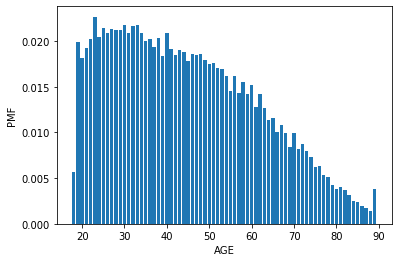

In [16]:
age = gss['age']

pmf_age = Pmf.from_seq(age)

pmf_age.bar()

plt.xlabel("AGE")
plt.ylabel("PMF")

plt.show()

### Make a CDF

In [17]:
# Select the age column
age = gss['age']

# Compute the CDF of age
cdf_age = Cdf.from_seq(age)

# Calculate the CDF of 30
print(cdf_age(30))

0.2539137136526389


- **What fraction of the respondents in the GSS dataset are OLDER than 30?**
    - [X] Approximately 75%
    - [ ] Approximately 65%
    - [ ] Approximately 45%
    - [ ] Approximately 25%

### Compute IQR
Recall from the video that the interquartile range (IQR) is the difference between the 75th and 25th percentiles. It is a measure of variability that is robust in the presence of errors or extreme values.

- compute the interquartile range of income in the `gss` dataset. Income is stored in the `'realinc'` column

In [18]:
income = gss['realinc']
cdf_income = Cdf.from_seq(income)

# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(0.75)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr = percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)

29676.0


- What is the interquartile range (IQR) of income in the GSS dataset?
    - [X] Approximately 29676
    - [ ] Approximately 26015
    - [ ] Approximately 34702
    - [ ] Approximately 30655

### Plot a CDF
The distribution of income in almost every country is long-tailed; that is, there are a small number of people with very high incomes.

In the `gss` dataset, the variable `'realinc'` represents total household income, converted to 1986 dollars. We can get a sense of the shape of this distribution by plotting the CDF.

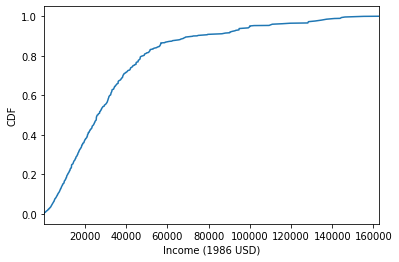

In [19]:
# Select realinc
income = gss['realinc']

# Make the CDF
cdf_income = Cdf.from_seq(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

### Distribution of education
Let's begin comparing incomes for different levels of education in the `gss` dataset The variable `'educ'` represents the respondent's years of education.

- **What fraction of respondents report that they have 12 years of education or fewer?**
    - [ ] Approximately 22%
    - [ ] Approximately 31%
    - [ ] Approximately 47%
    - [X] Approximately 53%

In [20]:
cdf_educ = Cdf.from_seq(gss['educ'])
cdf_educ(12)

array(0.53226117)

### Extract education levels
Let's create Boolean Series to identify respondents with different levels of education.

In the US, 12 years of education usually means the respondent has completed high school (secondary education). A respondent with 14 years of education has probably completed an associate degree (two years of college); someone with 16 years has probably completed a bachelor's degree (four years of college).

- **Complete the line that identifies respondents with associate degrees, that is, people with 14 or more years of education but less than 16.**
- **Complete the line that identifies respondents with 12 or fewer years of education.**
- **Confirm that the mean of high is the fraction we computed in the previous exercise,about 53%.**

In [21]:
# Select educ
educ = gss['educ']

# Bachelor's degree
bach = (educ >= 16)

# Associate degree
assc = (educ < 16) & (educ >= 14)

# High school (12 or fewer years of education)
high = educ <= 12
print(high.mean())

0.5308807991547402


### Plot income CDFs
Let's now see what the distribution of income looks like for people with different education levels. You can do this by plotting the CDFs. Recall how Allen plotted the income CDFs of respondents interviewed before and after 1995:
```py
Cdf(income[pre95]).plot(label='Before 1995')
Cdf(income[~pre95]).plot(label='After 1995')
```
You can assume that Boolean Series have been defined, as in the previous exercise, to identify respondents with different education levels: `high`, `assc`, and `bach`.

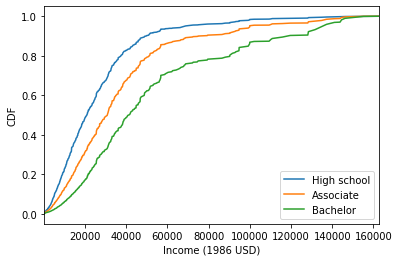

In [22]:
income = gss['realinc']

# Plot the CDFs
Cdf.from_seq(income[high]).plot(label='High school')
Cdf.from_seq(income[assc]).plot(label='Associate')
Cdf.from_seq(income[bach]).plot(label='Bachelor')

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.legend()
plt.show()

### Distribution of income
In many datasets, the distribution of income is approximately **lognormal**, which means that the logarithms of the incomes fit a normal distribution. We'll see whether that's true for the `gss` data. As a first step, you'll compute the mean and standard deviation of the log of incomes using `numpy`'s `np.log10()` function.

Then, you'll use the computed mean and standard deviation to make a norm object using the scipy.stats.norm() function.

In [23]:
# Extract realinc and compute its log
income = gss['realinc']
log_income = np.log10(income)

# Compute mean and standard deviation
mean = np.mean(log_income)
std = np.std(log_income)
print(mean, std)

# Make a norm object
dist = norm(mean, std)

4.371148677933652 0.4290043733010077


### Comparing CDFs
To see whether the distribution of income is well modeled by a lognormal distribution, we'll compare the CDF of the logarithm of the data to a normal distribution with the same mean and standard deviation. These variables from the previous exercise are available for use:
```py
# Extract realinc and compute its log
log_income = np.log10(gss['realinc'])

# Compute mean and standard deviation
mean, std = log_income.mean(), log_income.std()

# Make a norm object
from scipy.stats import norm
dist = norm(mean, std)
```
dist is a `scipy.stats.norm` object with the same mean and standard deviation as the data. It provides .`cdf()`, which evaluates the normal cumulative distribution function.

Be careful with capitalization: `Cdf()`, with an uppercase C, creates Cdf objects. `dist.cdf()`, with a lowercase c, evaluates the normal cumulative distribution function.

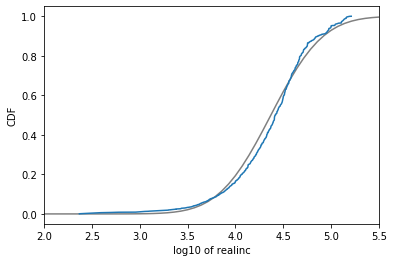

In [24]:
# Evaluate the model CDF
xs = np.linspace(2, 5.5)
ys = dist.cdf(xs)

# Plot the model CDF
plt.clf()
plt.plot(xs, ys, color='gray')

# Create and plot the Cdf of log_income
Cdf.from_seq(log_income).plot()
    
# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('CDF')
plt.show()

### Comparing PDFs
In the previous exercise, we used CDFs to see if the distribution of income is lognormal. We can make the same comparison using a PDF and KDE. That's what you'll do in this exercise!

As before, the norm object dist is available in your workspace:

```py
from scipy.stats import norm
dist = norm(mean, std)
```

Just as all `norm` objects have a `.cdf()` method, they also have a `.pdf()` method.

To create a KDE plot, you can use `seaborn`'s `kdeplot()` function.

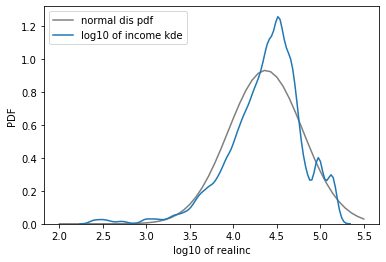

In [26]:
# Evaluate the normal PDF
xs = np.linspace(2, 5.5)
ys = dist.pdf(xs)

# Plot the model PDF
plt.clf()
plt.plot(xs, ys, color='gray', label = 'normal dis pdf')

# Plot the data KDE
sns.kdeplot(log_income, label = 'log10 of income kde')

# Label the axes
plt.xlabel('log10 of realinc')
plt.ylabel('PDF')
plt.legend()
plt.show()

## 3. Relationships

## 4. Multivariate Thinking